<a href="https://colab.research.google.com/github/esraasayed98/Practice_DL/blob/main/CIFAR_10_with_Dense_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


# Load data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# visualize images

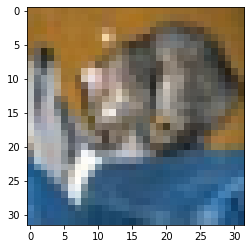

In [ ]:
img = test_images[0]
plt.imshow(img)

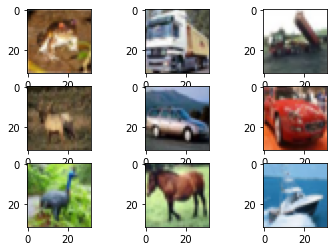

In [ ]:
# example of loading the cifar10 dataset
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])
# show the figure
plt.show()

# Plot a histogram of number of examples per class in the training and test sets

In [ ]:
# # number of examples in the training set
# df=pd.DataFrame()
# # df['label']=np.unique(train_labels)
# df['train_count']=np.array(pd.DataFrame(train_labels).value_counts())
# df['test_count']=np.array(pd.DataFrame(test_labels).value_counts())

# df.plot(kind='hist',
#         alpha=0.7,
#         bins=30,
#         title='Histogram Of Test Scores',
#         rot=45,
#         grid=True,
#         figsize=(12,8),
#         fontsize=15, 
#         color=['#A0E8AF', '#FFCF56'])

In [ ]:
# number of examples in the testing set
pd.DataFrame(train_labels).value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [ ]:
# number of examples in the testing set
pd.DataFrame(test_labels).value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

# Reshape data 

In [ ]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / np.max(train_images[0])

test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / np.max(test_images[0])

In [ ]:
train_images.shape

(50000, 3072)

In [ ]:
test_images.shape

(10000, 3072)

# one hot encoding to labels

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape

(50000, 10)

In [ ]:
test_labels.shape

(10000, 10)

# Split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True, stratify=train_labels)

# Model

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(256, activation='relu', name='Layer_3'))
network.add(layers.Dense(128, activation='relu', name='Layer_4'))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_3 (Dense)             (None, 256)               131328    
                                                                 
 Layer_4 (Dense)             (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


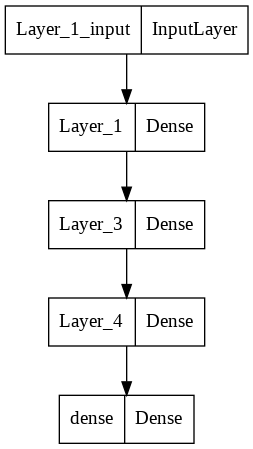

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network)

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=10e-3)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=100, batch_size=64)

Epoch 1/100
782/782 [==============================] - 6s 5ms/step - loss: 2.2020 - accuracy: 0.2665
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.8571 - accuracy: 0.3187
Epoch 3/100
782/782 [==============================] - 3s 4ms/step - loss: 1.8339 - accuracy: 0.3275
Epoch 4/100
782/782 [==============================] - 3s 3ms/step - loss: 1.8127 - accuracy: 0.3352
Epoch 5/100
782/782 [==============================] - 3s 3ms/step - loss: 1.8091 - accuracy: 0.3357
Epoch 6/100
782/782 [==============================] - 2s 3ms/step - loss: 1.8039 - accuracy: 0.3372
Epoch 7/100
782/782 [==============================] - 2s 3ms/step - loss: 1.8060 - accuracy: 0.3353
Epoch 8/100
782/782 [==============================] - 3s 3ms/step - loss: 1.7993 - accuracy: 0.3391
Epoch 9/100
782/782 [==============================] - 3s 3ms/step - loss: 1.7925 - accuracy: 0.3411
Epoch 10/100
782/782 [==============================] - 3s 3ms/step - loss: 1.7897 - accura

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.8179 - accuracy: 0.3100


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.3100000023841858


# try with validation 

In [ ]:
history = network.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7378 - accuracy: 0.3392 - val_loss: 1.7265 - val_accuracy: 0.3489
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7367 - accuracy: 0.3383 - val_loss: 1.7332 - val_accuracy: 0.3505
Epoch 3/100
313/313 [==============================] - 1s 5ms/step - loss: 1.7415 - accuracy: 0.3401 - val_loss: 1.7288 - val_accuracy: 0.3465
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7343 - accuracy: 0.3417 - val_loss: 1.7276 - val_accuracy: 0.3365
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7417 - accuracy: 0.3373 - val_loss: 1.7487 - val_accuracy: 0.3367
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7429 - accuracy: 0.3395 - val_loss: 1.8176 - val_accuracy: 0.3035
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 1.7406 - accuracy: 0.3411 - val_loss: 1.7435 - val_accuracy: 0.3400

# training loss vs. validation loss over the number of epochs

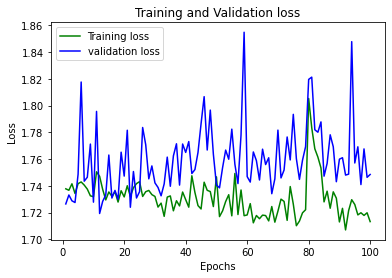

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# test model

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.7884 - accuracy: 0.3335


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.3334999978542328
